# HeliPads per Country - Homework 1IAS21
In this homework we will plot the number of Helipads that every country has - as DDSm, PSM, and Choropleth.

## Imports
First, we import all packages that we need

In [2]:
import geopandas as gpd
import pandas as pd
from thefuzz.process import extractOne as best
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from thefuzz import process


## Data
Now we import the data that we will be using. Usamos GeoJson https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html 

In [19]:
linkGitMap='https://raw.githubusercontent.com/vinconig/1IAS21-3/main/us-state-boundaries.geojson'
usstates=gpd.read_file(linkGitMap)
usstates.rename(columns={"name": "State"}, inplace=True)
usstates.tail()


,gid,arealand,division,intptlat,State,objectid,areawater,intptlon,oid,funcstat,...,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry
51,50,-1459974156,3,44.630907,Wisconsin,16,-703725080,-89.709392,317035270,A,...,55,01779806,44.627322,Wisconsin,G4000,2,00,55,"{ ""lon"": -89.732894645900004, ""lat"": 44.639893...","POLYGON ((-92.88707 45.64415, -92.8825 45.6594..."
52,45,-342263542,1,41.579778,Connecticut,11,1815476291,-72.746667,-1753705891,A,...,09,01779780,41.575144,Connecticut,G4000,1,00,09,"{ ""lon"": -72.738273382000003, ""lat"": 41.575019...","POLYGON ((-73.51808 41.66672, -73.49223 41.967..."
53,29,197759069,0,-14.266848,American Samoa,42,1307243753,-170.667185,-1625689740,A,...,60,01802701,-13.963831,American Samoa,G4000,9,00,60,"{ ""lon"": -170.07966926099999, ""lat"": -13.96626...","MULTIPOLYGON (((-170.79716 -14.24664, -170.75 ..."
54,26,1793942590,2,42.913397,New York,39,2063248491,-75.596272,-1984827836,A,...,36,01779796,42.919793,New York,G4000,1,00,36,"{ ""lon"": -75.596516371600003, ""lat"": 42.921224...","MULTIPOLYGON (((-79.31214 42.68681, -78.99976 ..."
55,41,-698155119,8,44.348422,Idaho,7,-1903599535,-114.558854,-1954881512,A,...,16,01779783,44.352406,Idaho,G4000,4,00,16,"{ ""lon"": -114.65939986799999, ""lat"": 44.388926...","POLYGON ((-116.89971 44.84061, -116.89625 44.8..."


<Axes: >

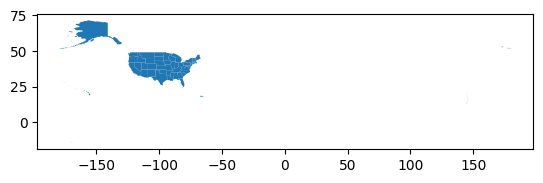

In [13]:
usstates.plot() #yay, our gound map

And the numer of registered firearms by state from statista: https://www.statista.com/statistics/215655/number-of-registered-weapons-in-the-us-by-state/?srsltid=AfmBOoqcgMI7RLbSfGFsvQr-vL3SjZwEmSPNKu30kUml6l6aBFJtO0nt . We will access it from my personal but public GitHub

In [18]:
linkGitData='https://raw.githubusercontent.com/vinconig/1IAS21-3/main/us_states_values.csv'
RegFa=pd.read_csv(linkGitData, sep=',')

RegFa.rename(columns={"Value": "NumRegFa"}, inplace=True)
RegFa.head()

,State,NumRegFa
0,Texas,1136732
1,Florida,631809
2,Virginia,479582
3,California,418971
4,Georgia,377800


## Merge Data
In the next step, we want to merge the data, based on the column "country" - unfortunately we are not using a unified code here (that do exist) but strings of the country names. There are some deviations in how its written, so we have to make some changes to get them to match, before we can merge.

First, let's see which ones are in the HeliPort Datafram (DF) but arent in the World Geographic Data Frame (GDF). (Exact match)

In [21]:
onlyDF = set(RegFa.State)-set(usstates.State)
onlyDF

set()

Luckily, nothing that doesnt match, so we are good to go.

But now we can finally merge the two. The World Package will stay the same (operation left) but we will add the HeliPort Data to it

In [ ]:
theMapAndData=usstates.merge(RegFa, on='State', how="left")
#the format was friggin annoying, who saves numers as a string and then uses a comma as a divider for thousands??? jeez CIA
# theMapAndData["NumRegFa"] = (
#     theMapAndData["NumRegFa"]
#     .astype(str)              # make sure it's string
#     .str.replace(",", "", regex=False)  # remove commas
#     .astype(float)            # convert to number
# )
# theMapAndData["NumRegFa"] = pd.to_numeric(theMapAndData["NumRegFa"], errors="coerce")

theMapAndData.head()

,gid,arealand,division,intptlat,State,objectid,areawater,intptlon,oid,funcstat,...,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry,NumRegFa
0,49,1870899812,2,40.107274,New Jersey,15,-753053640,-74.665201,-1799523090,A,...,01779795,40.105049,New Jersey,G4000,1,00,34,"{ ""lon"": -74.655547375500007, ""lat"": 40.110276...","POLYGON ((-75.1896 40.59178, -75.19229 40.6026...",115437.0
1,21,-1361459624,4,42.070024,Iowa,55,1078023380,-93.493347,279100047,A,...,01779785,42.075359,Iowa,G4000,2,00,19,"{ ""lon"": -93.500302020600003, ""lat"": 42.074732...","POLYGON ((-96.49878 42.56104, -96.48615 42.573...",72406.0
2,4,-1971382068,7,31.434703,Texas,26,1846131515,-99.281824,319382675,A,...,01779801,31.427766,Texas,G4000,3,00,48,"{ ""lon"": -99.317174895600004, ""lat"": 31.447206...","POLYGON ((-103.98018 32.00012, -103.06451 32.0...",1136732.0
3,8,-576269925,6,35.858556,Tennessee,30,-1940028667,-86.349358,272048646,A,...,01325873,35.858141,Tennessee,G4000,3,00,47,"{ ""lon"": -86.343241845700007, ""lat"": 35.843040...","POLYGON ((-82.22206 36.15696, -82.22427 36.150...",192757.0
4,40,-1616974352,1,41.597419,Rhode Island,6,1323457457,-71.527272,-1861167639,A,...,01219835,41.594025,Rhode Island,G4000,1,00,44,"{ ""lon"": -71.524812175999998, ""lat"": 41.594693...","MULTIPOLYGON (((-71.7897 41.72456, -71.79788 4...",4895.0


## Plots
Let's get to plotting!

<Axes: >

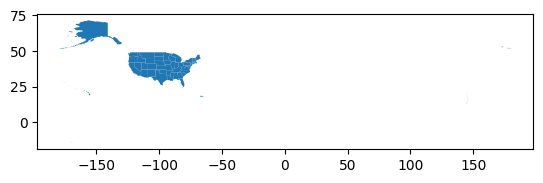

In [23]:
theMapAndData.plot() #yay, our gound map

### Diagrama de Dispersión de Mapas
First, we use the technique that we learned in the course for the dots, showing density. the dot value will be 1 as our numbers are so small, and 1 is even the most common in our dataset. We first have to throw out all the NaNs and 0es, otherwise it doesnt work. We will create a new DF for this

In [ ]:
justDots=theMapAndData.copy()
dot_value = 1
justDots = justDots.dropna(subset=["NumRegFa"])
justDots["num_dots"] = (justDots["NumRegFa"] / dot_value).astype(int) + 1
justDots = justDots[justDots["num_dots"] > 0]
justDots.head()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)
justDots.reset_index(drop=True, inplace=True)
World_dots=gpd.GeoDataFrame(geometry=justDots)


Now the plot


<Axes: >

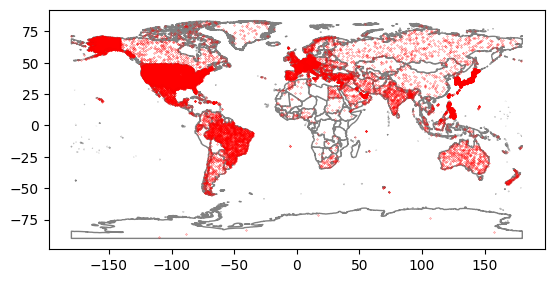

In [133]:
base=theMapAndData.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
World_dots.plot(markersize=0.05, color='red',ax=base)

### Proporción Simple de Mapas
Next: a proportional dot plot. We will be using matplotlib here because its easier. The centeroids were not manually adjusted, so they arent perfect.


/var/folders/4s/_4bl0c291990qqkpvgrj459r0000gn/T/ipykernel_89739/2894938458.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  theMapAndData["centroid"] = theMapAndData.geometry.centroid
/var/folders/4s/_4bl0c291990qqkpvgrj459r0000gn/T/ipykernel_89739/2894938458.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  theMapAndData.centroid.plot(


<Axes: >

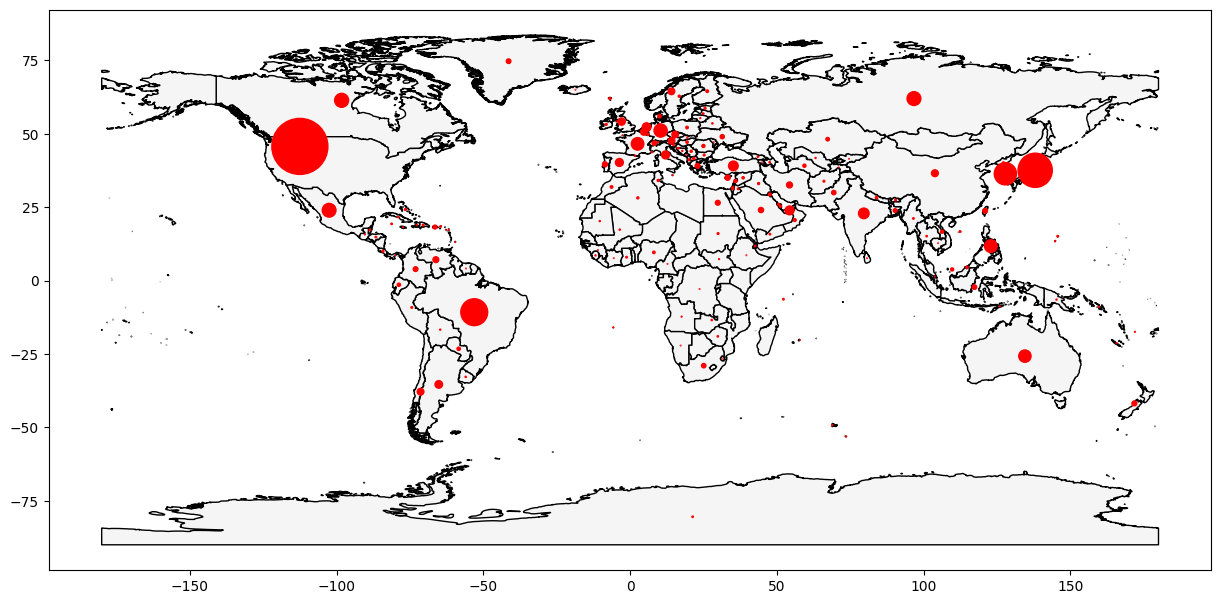

In [ ]:
# compute centroids
theMapAndData["centroid"] = theMapAndData.geometry.centroid

# plot base map
fig, ax = plt.subplots(figsize=(15, 10))
theMapAndData.plot(ax=ax, color="whitesmoke", edgecolor="black")

# plot dots
theMapAndData.centroid.plot(
    ax=ax,
    color="red",
    markersize=theMapAndData["NumRegFa"] * 0.2,
    zorder=5
)

### Choropleth
Last but not least, a choropleth map. a proportional dot plot. We will be using matplotlib here because its easier. The data here is normalized

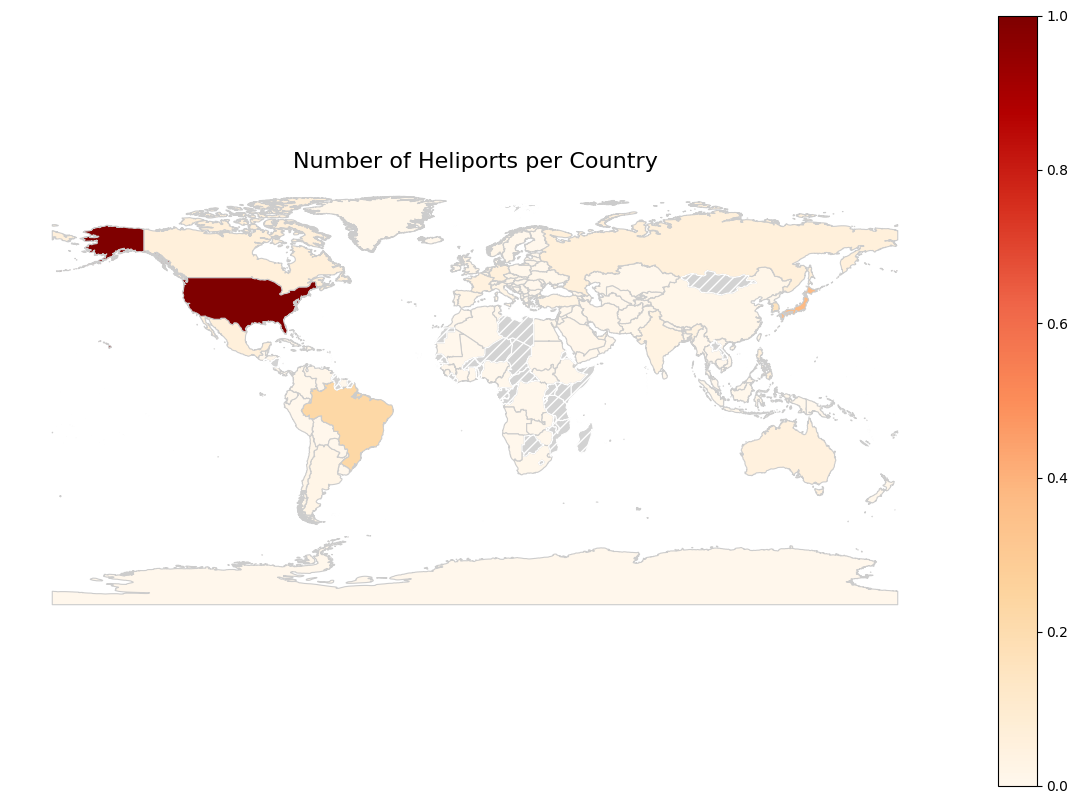

In [ ]:

fig, ax = plt.subplots(figsize=(15, 10))

theMapAndData.plot(
    column=(theMapAndData["NumRegFa"] - theMapAndData["NumRegFa"].min()) /
           (theMapAndData["NumRegFa"].max() - theMapAndData["NumRegFa"].min()),
    cmap="OrRd",               # color map ("Oranges-Red")
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True,               # add legend
    missing_kwds={             # style for missing values
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }
)

ax.set_title("Number of Heliports per Country", fontsize=16)
ax.axis("off")
plt.show()


### Choropleth Bonus
Since the US is somewhat of an outlier, it skews even normalized data. thats why I propose a log scale.



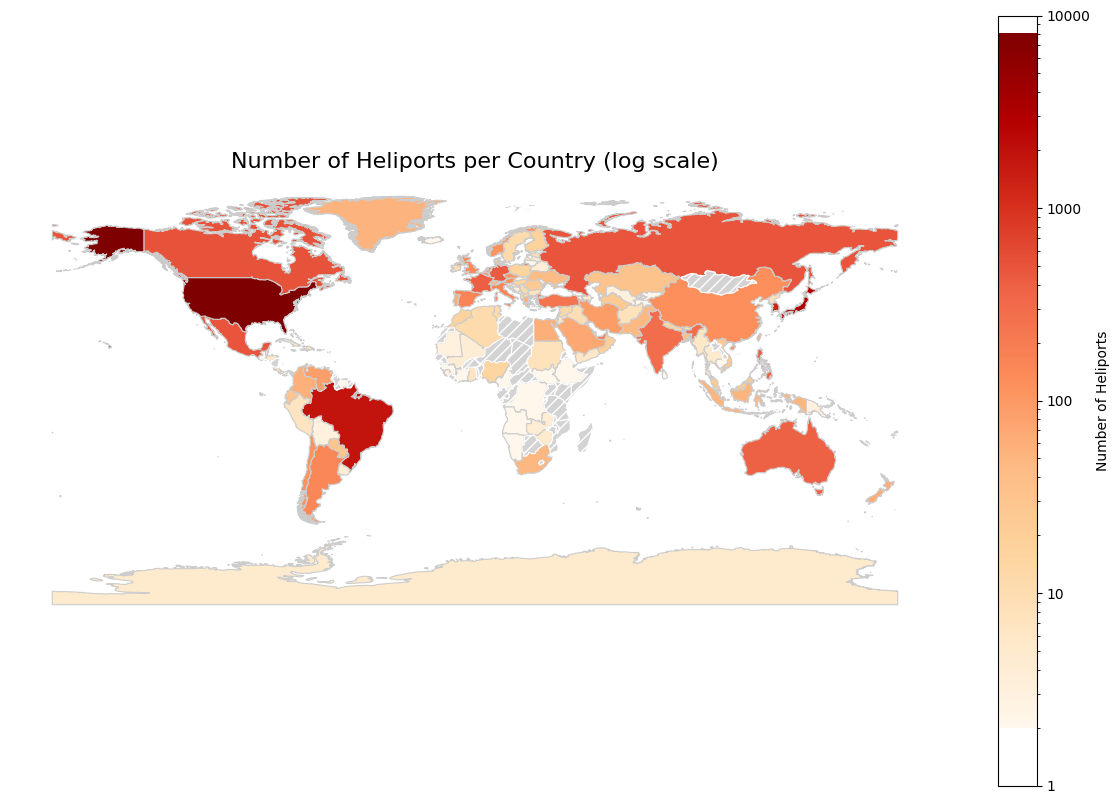

In [ ]:


fig, ax = plt.subplots(figsize=(15, 10))

# log-normalized choropleth
norm = colors.LogNorm(
    vmin=theMapAndData["NumRegFa"].min()+1,  # avoid log(0)
    vmax=theMapAndData["NumRegFa"].max()
)

plot = theMapAndData.plot(
    column="NumRegFa",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=False,
    norm=norm,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }
)

# custom colorbar
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=norm)
sm._A = []  
cbar = fig.colorbar(sm, ax=ax)

# force log-spaced ticks
ticks = [1, 10, 100, 1000, 10000]  # adjust to your data range
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(t) for t in ticks])

cbar.set_label("Number of Heliports")

ax.set_title("Number of Heliports per Country (log scale)", fontsize=16)
ax.axis("off")
plt.show()
